# Permodelan

### Mencari Jumlah Cluster yang Optimal

In [2]:
#install library
!pip3 install kmodes

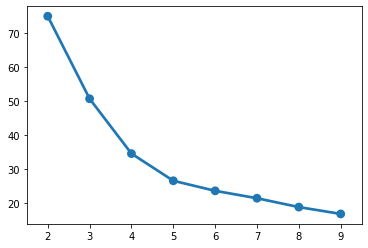

In [3]:
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
df_model = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/df-customer-segmentation.csv')

# Melakukan Iterasi untuk Mendapatkan nilai Cost  
cost = {}  
for k in range(2,10):  
    kproto = KPrototypes (n_clusters = k,random_state=75)  
    kproto.fit_predict(df_model, categorical=[0,1,2])  
    cost[k]= kproto.cost_  
  
# Memvisualisasikan Elbow Plot  
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))  
plt.show()

### Membuat Model

In [4]:
import pandas as pd 
df_model = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/df-customer-segmentation.csv')

import pickle  
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
  
kproto = KPrototypes (n_clusters = 5, random_state = 75)  
kproto = kproto.fit(df_model, categorical = [0,1,2])  
  
#Save Model  
pickle.dump(kproto, open('cluster.pkl', 'wb'))  

### Menggunakan Model

In [5]:
import pandas as pd
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t") 
df_model = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/df-customer-segmentation.csv')
kproto = KPrototypes(n_clusters=5, random_state = 75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  

# Menentukan segmen tiap pelanggan    
clusters =  kproto.predict(df_model, categorical = [0,1,2])    
print('segmen pelanggan: {}\n'.format(clusters))    
    
# Menggabungkan data awal dan segmen pelanggan    
df_final = df.copy()    
df_final['cluster'] = clusters
print(df_final.head())   

segmen pelanggan: [1 0 2 2 3 4 1 2 4 4 2 2 1 1 3 4 4 2 3 0 3 2 4 3 3 2 3 4 2 2 0 1 0 3 4 3 4
 1 4 0 4 3 4 3 4 3 2 1 4 1]

  Customer_ID       Nama Pelanggan  ... NilaiBelanjaSetahun  cluster
0    CUST-001         Budi Anggara  ...             9497927        1
1    CUST-002     Shirley Ratuwati  ...             2722700        0
2    CUST-003         Agus Cahyono  ...             5286429        2
3    CUST-004     Antonius Winarta  ...             5204498        2
4    CUST-005  Ibu Sri Wahyuni, IR  ...            10615206        3

[5 rows x 8 columns]


### Menampilkan Cluster Tiap Pelanggan

In [8]:
import pandas as pd
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t") 
df_model = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/df-customer-segmentation.csv')
kproto = KPrototypes(n_clusters=5, random_state = 75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  

clusters =  kproto.predict(df_model, categorical=[0,1,2]) 
df_final = df.copy()    
df_final['cluster'] = clusters 

# Menampilkan data pelanggan berdasarkan cluster nya  
for i in range (0,5):  
    print('\nPelanggan cluster: {}\n'.format(i))  
    print(df_final[df_final['cluster']== i])


Pelanggan cluster: 0

   Customer_ID    Nama Pelanggan  ... NilaiBelanjaSetahun  cluster
1     CUST-002  Shirley Ratuwati  ...             2722700        0
19    CUST-020    Irene Novianto  ...             2896845        0
30    CUST-031     Eviana Handry  ...             3042773        0
32    CUST-033   Cecilia Kusnadi  ...             3047926        0
39    CUST-040    Irene Darmawan  ...             2861855        0

[5 rows x 8 columns]

Pelanggan cluster: 1

   Customer_ID    Nama Pelanggan  ... NilaiBelanjaSetahun  cluster
0     CUST-001      Budi Anggara  ...             9497927        1
6     CUST-007     Cahyono, Agus  ...             9837260        1
12    CUST-013      Cahaya Putri  ...             9333168        1
13    CUST-014    Mario Setiawan  ...             9471615        1
31    CUST-032   Chintya Winarni  ...            10663179        1
37    CUST-038      Agatha Salim  ...            10477127        1
47    CUST-048  Maria Hutagalung  ...            10390732    

### Visualisasi Hasil Clustering - Box Plot

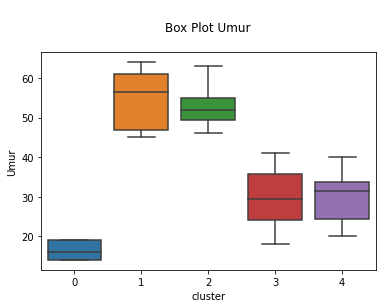

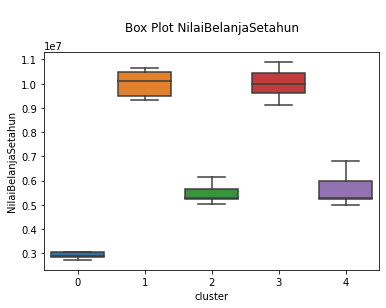

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t") 
df_model = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/df-customer-segmentation.csv')
kproto = KPrototypes(n_clusters=5, random_state = 75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  

clusters =  kproto.predict(df_model, categorical=[0,1,2]) 
df_final = df.copy()    
df_final['cluster'] = clusters 

# Data Numerical
kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
  
for i in kolom_numerik:  
    plt.figure(figsize=(6,4))  
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final)  
    plt.title ('\nBox Plot {}\n'.format(i), fontsize=12)  
    plt.show() 

### Visualisasi Hasil Clustering - Count Plot

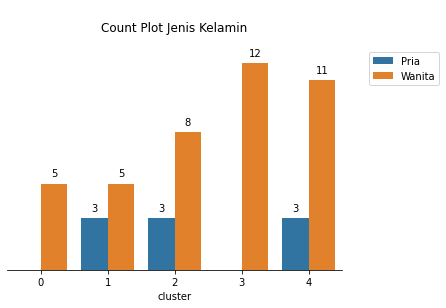

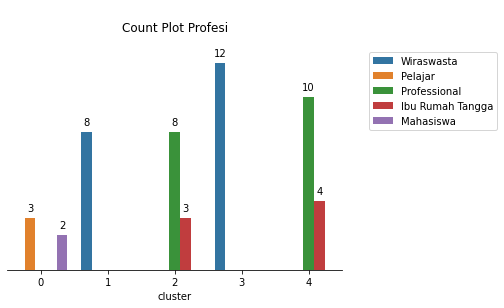

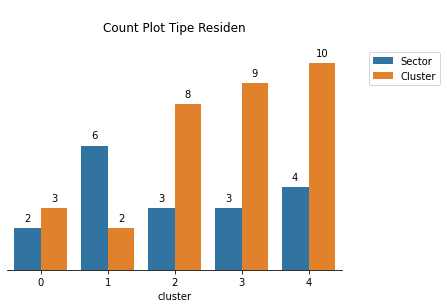

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t") 
df_model = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/df-customer-segmentation.csv')
kproto = KPrototypes(n_clusters=5, random_state = 75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  

clusters =  kproto.predict(df_model, categorical=[0,1,2]) 
df_final = df.copy()    
df_final['cluster'] = clusters 

# Data Kategorikal  
kolom_categorical = ['Jenis Kelamin','Profesi','Tipe Residen']  
  
for i in kolom_categorical:  
    plt.figure(figsize=(6,4))  
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i )  
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)  
    ax.legend(loc="upper center")  
    plt.legend(bbox_to_anchor = (1.08, 1), borderaxespad = 0)
    for p in ax.patches:  
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                     ha = 'center',  
                     va = 'center',  
                     xytext = (0, 10),  
                     textcoords = 'offset points')  
      
    sns.despine(right=True,top = True, left = True)  
    ax.axes.yaxis.set_visible(False)  
    plt.show()  

### Menamakan Cluster

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t") 
df_model = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/df-customer-segmentation.csv')
kproto = KPrototypes(n_clusters=5, random_state = 75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  

clusters =  kproto.predict(df_model, categorical=[0,1,2]) 
df_final = df.copy()    
df_final['cluster'] = clusters 

# Mapping nama kolom  
df_final['segmen'] = df_final['cluster'].map({  
    0: 'Diamond Young Member',  
    1: 'Diamond Senior Member',  
    2: 'Silver Member',  
    3: 'Gold Young Member',  
    4: 'Gold Senior Member'  
})  

print(df_final.info())
print(df_final.head())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
 7   cluster              50 non-null     uint16
 8   segmen               50 non-null     object
dtypes: int64(2), object(6), uint16(1)
memory usage: 3.3+ KB
None
  Customer_ID       Nama Pelanggan  ... cluster                 segmen
0    CUST-001         Budi Anggara  ...       1  Diamond Senior Member
1    CUST-002     Shirley Ratuwati  ...       0   Diamond Young Member
2    CUST-003         Agus Cahyono  ...       2          Silver Member
3    CUST

# Mengoperasikan Model

### Mempersiapkan Data Baru

In [13]:
import pandas as pd
# Data Baru  
data = [{  
    'Customer_ID': 'CUST-100' ,  
    'Nama Pelanggan': 'Joko' ,  
    'Jenis Kelamin': 'Pria',  
    'Umur': 45,  
    'Profesi': 'Wiraswasta',  
    'Tipe Residen': 'Cluster' ,  
    'NilaiBelanjaSetahun': 8230000  
      
}]  
  
# Membuat Data Frame  
new_df = pd.DataFrame(data)  
  
# Melihat Data  
print(new_df)  

  Customer_ID Nama Pelanggan  ... Tipe Residen  NilaiBelanjaSetahun
0    CUST-100           Joko  ...      Cluster              8230000

[1 rows x 7 columns]


### Membuat Fungsi Data Pemrosesan

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t") 
df_model = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/df-customer-segmentation.csv')
kproto = KPrototypes(n_clusters=5, random_state = 75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  

clusters =  kproto.predict(df_model, categorical=[0,1,2]) 
df_final = df.copy()    
df_final['cluster'] = clusters 
df_final['segmen'] = df_final['cluster'].map({  
    0: 'Diamond Young Member',  
    1: 'Diamond Senior Member',  
    2: 'Silver Member',  
    3: 'Gold Young Member',  
    4: 'Gold Senior Member'  
})  

data = [{  
    'Customer_ID': 'CUST-100' ,  
    'Nama Pelanggan': 'Joko' ,  
    'Jenis Kelamin': 'Pria',  
    'Umur': 45,  
    'Profesi': 'Wiraswasta',  
    'Tipe Residen': 'Cluster' ,  
    'NilaiBelanjaSetahun': 8230000  
      
}]
new_df = pd.DataFrame(data) 

def data_preprocess(data):  
    # Konversi Kategorikal data  
    kolom_kategorikal = ['Jenis Kelamin', 'Profesi', 'Tipe Residen']  
      
    df_encode = data[kolom_kategorikal].copy()  
  
    ## Jenis Kelamin   
    df_encode['Jenis Kelamin'] = df_encode['Jenis Kelamin'].map({  
        'Pria': 0,  
        'Wanita' : 1  
    })  
      
    ## Profesi  
    df_encode['Profesi'] = df_encode['Profesi'].map({  
        'Ibu Rumah Tangga': 0,  
        'Mahasiswa' : 1,  
        'Pelajar': 2,  
        'Professional': 3,  
        'Wiraswasta': 4  
    })  
      
    ## Tipe Residen  
    df_encode['Tipe Residen'] = df_encode['Tipe Residen'].map({  
        'Cluster': 0,  
        'Sector' : 1  
    })  
      
    # Standardisasi Numerical Data  
    kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
    df_std = data[kolom_numerik].copy()  
      
    ## Standardisasi Kolom Umur  
    df_std['Umur'] = (df_std['Umur'] - 37.5)/14.7  
      
    ## Standardisasi Kolom Nilai Belanja Setahun  
    df_std['NilaiBelanjaSetahun'] = (df_std['NilaiBelanjaSetahun'] - 7069874.8)/2590619.0  
      
    # Menggabungkan Kategorikal dan numerikal data  
    df_model = df_encode.merge(df_std, left_index = True,  
                           right_index=True, how = 'left')  
      
    return df_model  
  
# Menjalankan fungsi  
new_df_model = data_preprocess(new_df)  
  
print(new_df_model) 

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             0  0.510204             0.447818


### Memanggil Model dan Melakukan Prediksi

In [15]:
import pickle
import pandas as pd
data = [{  
    'Customer_ID': 'CUST-100' ,  
    'Nama Pelanggan': 'Joko' ,  
    'Jenis Kelamin': 'Pria',  
    'Umur': 45,  
    'Profesi': 'Wiraswasta',  
    'Tipe Residen': 'Cluster' ,  
    'NilaiBelanjaSetahun': 8230000  
      
}]
new_df = pd.DataFrame(data) 

def data_preprocess(data):
    kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']
    df_encode = data[kolom_kategorikal].copy()
    df_encode['Jenis Kelamin'] = df_encode['Jenis Kelamin'].map({  
        'Pria': 0,  
        'Wanita' : 1  
    })
    df_encode['Profesi'] = df_encode['Profesi'].map({  
        'Ibu Rumah Tangga': 0,  
        'Mahasiswa' : 1,  
        'Pelajar': 2,  
        'Professional': 3,  
        'Wiraswasta': 4  
    }) 
    df_encode['Tipe Residen'] = df_encode['Tipe Residen'].map({  
        'Cluster': 0,  
        'Sector' : 1  
    }) 
    kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
    df_std = data[kolom_numerik].copy()
    df_std['Umur'] = (df_std['Umur'] - 37.5)/14.7 
    df_std['NilaiBelanjaSetahun'] = (df_std['NilaiBelanjaSetahun'] - 7069874.8)/2590619.0
    df_model = df_encode.merge(df_std, left_index = True,  
                           right_index=True, how = 'left')  
    return df_model  
  
new_df_model = data_preprocess(new_df)

def modelling (data):  
      
    # Memanggil Model  
    kpoto = pickle.load(open('cluster.pkl', 'rb'))  
      
    # Melakukan Prediksi  
    clusters = kpoto.predict(data,categorical=[0,1,2])  
      
    return clusters  
  
# Menjalankan Fungsi  
clusters = modelling(new_df_model)  
  
print(clusters)  

[1]


### Menamakan Segmen

In [16]:
import pickle
import pandas as pd
data = [{  
    'Customer_ID': 'CUST-100' ,  
    'Nama Pelanggan': 'Joko' ,  
    'Jenis Kelamin': 'Pria',  
    'Umur': 45,  
    'Profesi': 'Wiraswasta',  
    'Tipe Residen': 'Cluster' ,  
    'NilaiBelanjaSetahun': 8230000  
      
}]
new_df = pd.DataFrame(data) 

def data_preprocess(data):
    kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']
    df_encode = data[kolom_kategorikal].copy()
    df_encode['Jenis Kelamin'] = df_encode['Jenis Kelamin'].map({  
        'Pria': 0,  
        'Wanita' : 1  
    })
    df_encode['Profesi'] = df_encode['Profesi'].map({  
        'Ibu Rumah Tangga': 0,  
        'Mahasiswa' : 1,  
        'Pelajar': 2,  
        'Professional': 3,  
        'Wiraswasta': 4  
    }) 
    df_encode['Tipe Residen'] = df_encode['Tipe Residen'].map({  
        'Cluster': 0,  
        'Sector' : 1  
    }) 
    kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
    df_std = data[kolom_numerik].copy()
    df_std['Umur'] = (df_std['Umur'] - 37.5)/14.7 
    df_std['NilaiBelanjaSetahun'] = (df_std['NilaiBelanjaSetahun'] - 7069874.8)/2590619.0
    df_model = df_encode.merge(df_std, left_index = True,  
                           right_index=True, how = 'left')  
    return df_model  
  
new_df_model = data_preprocess(new_df)  

def modelling (data): 
    kpoto = pickle.load(open('cluster.pkl', 'rb'))
    clusters = kpoto.predict(data,categorical=[0,1,2])  
    return clusters  
    
clusters = modelling(new_df_model)

def menamakan_segmen (data_asli, clusters):  
      
    # Menggabungkan cluster dan data asli  
    final_df = data_asli.copy()  
    final_df['cluster'] = clusters
      
    # Menamakan segmen  
    final_df['segmen'] = final_df['cluster'].map({  
        0: 'Diamond Young Member',  
        1: 'Diamond Senior Member',  
        2: 'Silver Students',  
        3: 'Gold Young Member',  
        4: 'Gold Senior Member'  
    })  
      
    return final_df
  
# Menjalankan Fungsi  
new_final_df = menamakan_segmen(new_df,clusters)  
  
print(new_final_df)  

  Customer_ID Nama Pelanggan  ... cluster                 segmen
0    CUST-100           Joko  ...       1  Diamond Senior Member

[1 rows x 9 columns]
